In [7]:
images, labels = next(iter(train_loader))
print(f"✅ Batch shape: {images.shape}")
print(f"✅ Sample labels: {labels[:10].tolist()}")
print(f"✅ Tumor count in batch: {(labels==1).sum().item()}")


✅ Batch shape: torch.Size([32, 3, 224, 224])
✅ Sample labels: [1, 1, 1, 0, 1, 1, 1, 0, 0, 1]
✅ Tumor count in batch: 22


c:\Users\Anvesha Garg\brain-tumor-detection\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


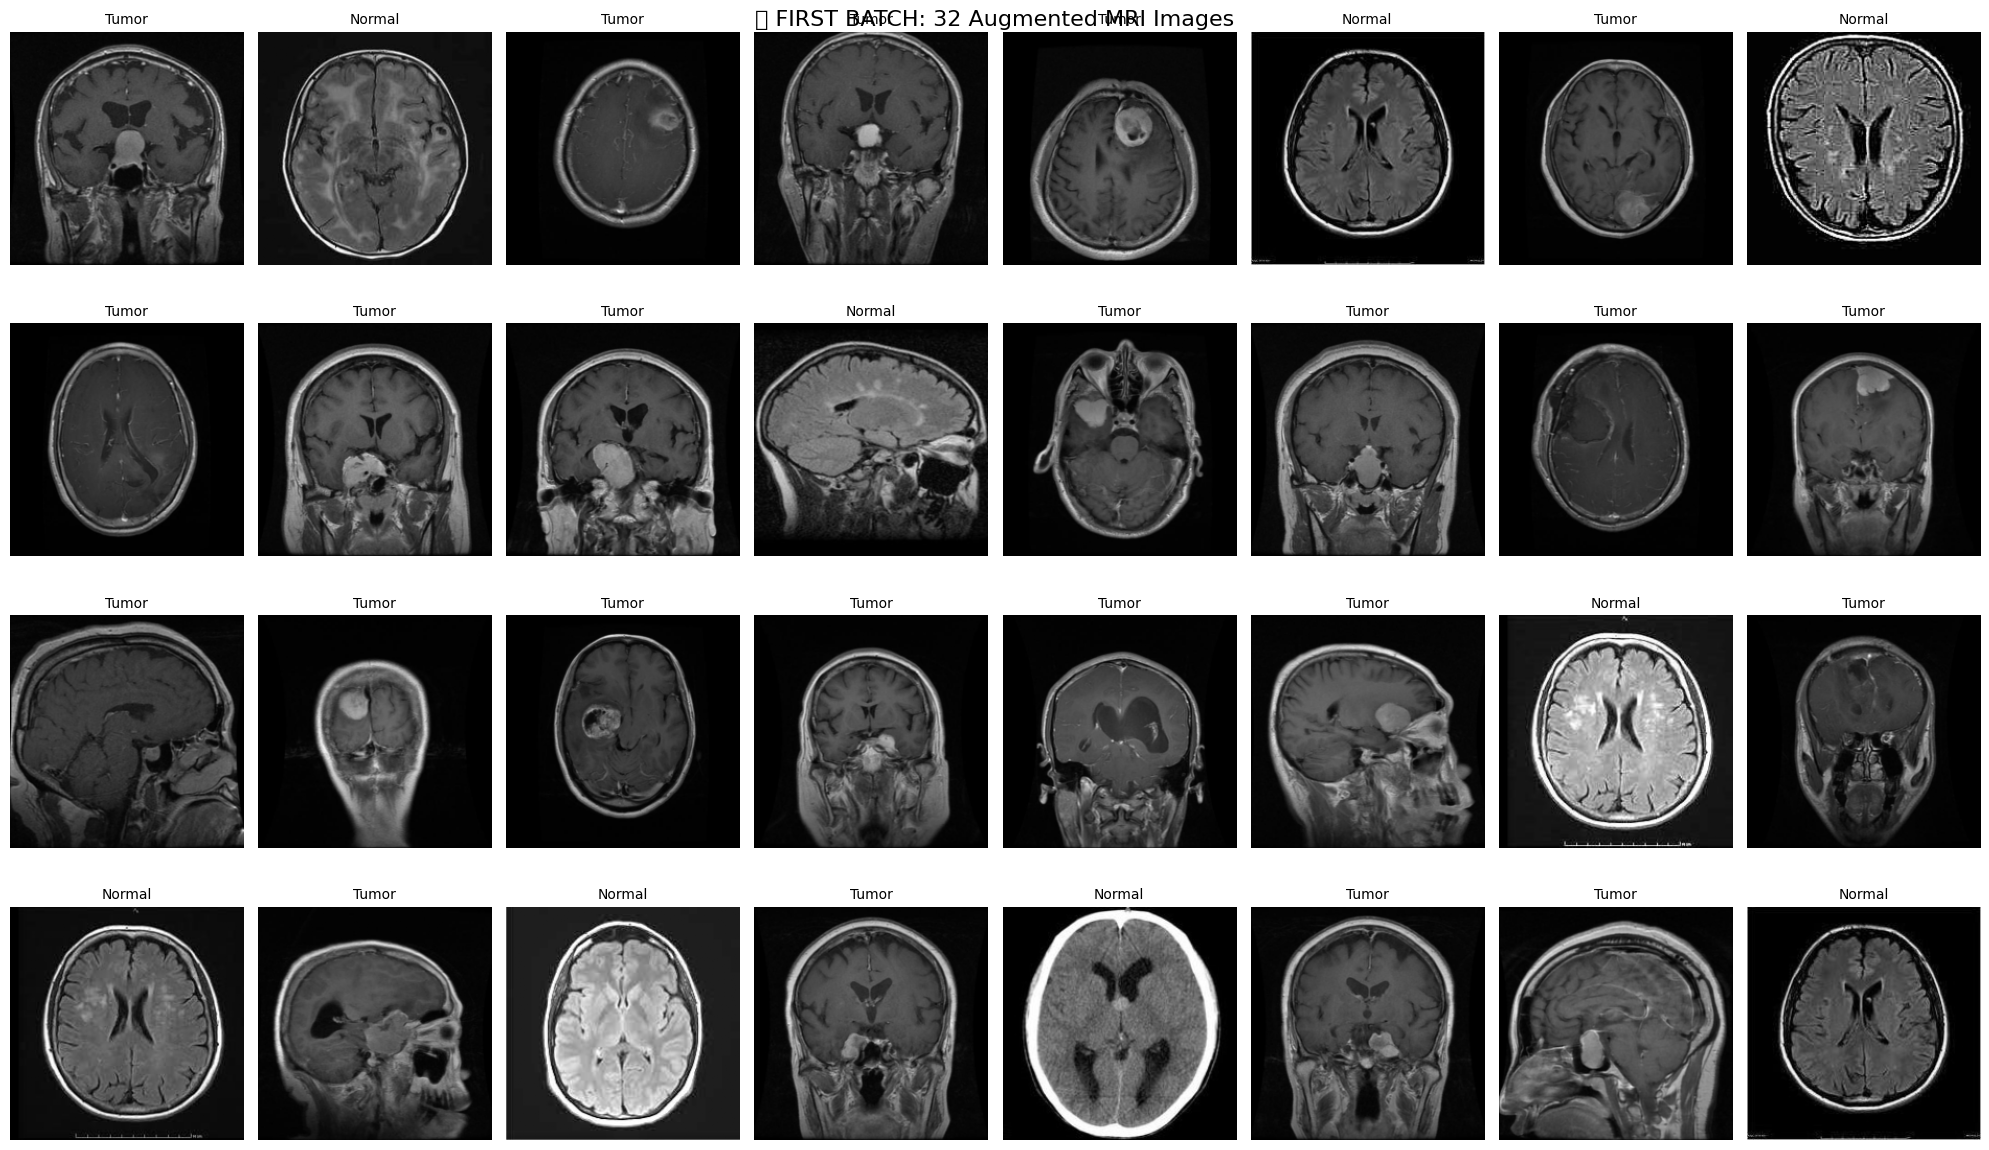

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Show first batch (32 MRI images)
fig, axs = plt.subplots(4, 8, figsize=(20, 12))
images, labels = next(iter(train_loader))

for i in range(32):
    ax = axs[i//8, i%8]
    # Denormalize for display
    img = images[i].permute(1,2,0).numpy()
    img = np.clip(img, 0, 1)
    ax.imshow(img)
    ax.set_title(f"Tumor" if labels[i]==1 else "Normal", fontsize=10)
    ax.axis('off')

plt.tight_layout()
plt.suptitle("✅ FIRST BATCH: 32 Augmented MRI Images", fontsize=16)
plt.show()


In [10]:
import torch.nn as nn

class BrainTumorCNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 32, 3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, 3, padding=1)
        self.conv3 = nn.Conv2d(64, 128, 3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(128 * 28 * 28, 512)
        self.fc2 = nn.Linear(512, 2)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.5)
    
    def forward(self, x):
        x = self.pool(self.relu(self.conv1(x)))
        x = self.pool(self.relu(self.conv2(x)))
        x = self.pool(self.relu(self.conv3(x)))
        x = x.view(-1, 128 * 28 * 28)
        x = self.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x

# Initialize
device = torch.device('cpu')  # Your setup
model = BrainTumorCNN()
print(f"✅ CNN Model ready: {sum(p.numel() for p in model.parameters()):,} parameters")


✅ CNN Model ready: 51,475,010 parameters
